## Import numeric and plotting packages

In [1]:
import numpy as np
import matplotlib as mpl; mpl.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

# Jupyter notebook magic for displaying plots right here, on the fly
%matplotlib inline

## Define function returning vector of derivatives

The particular code below corresponds to the damped harmonic oscillator.

In [2]:
def y_prime(t, y, b):
    # Inputs: [y[0], y[1]] = [y, y']
    # Returns: [y', y'']  = [y[1], -(b * y[1] + y[0])]
    return y[1], -(y[0] + b * y[1])

## Set integration time, initial values, parameters

In [3]:
t_span = (0, 4 * np.pi)                # Time span to integrate over
y0 = [1, 0]                            # Initial values
t_eval = np.linspace(*t_span, num=256) # Return solutions at these `t` points
b = 0.5                                # Damping parameter

## Numerically solve the Initial Value Problem

In [4]:
solution = solve_ivp(y_prime, t_span, y0, t_eval=t_eval, args=(b,))
t, y = solution.t, solution.y

## Set up plotting: add two subplots, a 2D and a 3D one

Text(0.5, 0.92, 'Pendulum: Energy Levels')

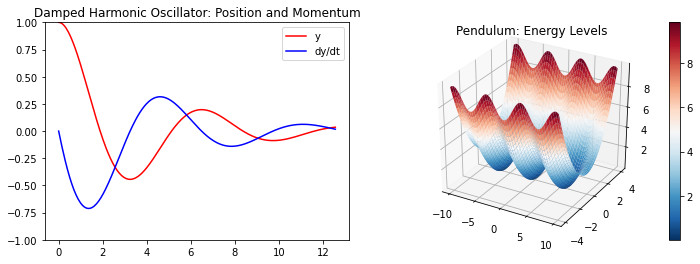

In [5]:
fig = plt.figure(figsize=plt.figaspect(1/3))
ax1 = fig.add_subplot(1, 2, 1) # 2D subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

sns.lineplot(t, y[0], color='red',  label='y',     ax=ax1)
sns.lineplot(t, y[1], color='blue', label='dy/dt', ax=ax1)
ax1.set_ylim(-1, 1)
ax1.legend(loc='upper right')
ax1.set_title('Damped Harmonic Oscillator: Position and Momentum')

X, Y = np.meshgrid(np.linspace(-10, 10, num=100), np.linspace(-4, 4, num=100))
Z = 0.5 * Y**2 - np.cos(X) + 1
c = ax2.plot_surface(X, Y, Z, cmap='RdBu_r')
plt.colorbar(c)
ax2.set_title('Pendulum: Energy Levels')
